In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from bnlp import NLTKTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
df_train = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_clean_train.xlsx')
df_val = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_clean_val.xlsx')

In [29]:
df_train

,Text,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভালো লেগেছে,1
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,0
...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চল...,1
12571,আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো...,2
12572,""" ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে ...",1
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকা...,2


In [30]:
df_train.groupby("Label").describe()

Text                                                               
      count unique                                                top freq
Label                                                                     
0      2894   2788   " আমি বলতাম , পানিতে না নেমে , স্বপ্নে সাঁতার...    3
1      5133   4902   ফাহিম ভাই শশুর বাড়ি গেলে শুধু মাছ বাড়ি দেয় না...    3
2      4548   4282   এইখানে ভালো ছেলেরা পড়াশোনা করে কিভাবে। এটা সা...    3

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [32]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [33]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [34]:
df_train.columns

Index(['Text', 'Label'], dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_train["classes_bin"] = lb_make.fit_transform(df_train["Label"])
df_val["classes_bin"] = lb_make.fit_transform(df_val["Label"])
df_train[["classes_bin", "Label"]].head(11)

,classes_bin,Label
0,2,Positive
1,0,Negative
2,2,Positive
3,2,Positive
4,1,Neutral
5,1,Neutral
6,0,Negative
7,2,Positive
8,1,Neutral
9,1,Neutral


In [36]:
df_train

,Text,Label,classes_bin
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,Positive,2
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,Negative,0
2,ভাই আপনার কথাই যাদু রয়েছে,Positive,2
3,উওরটা আমার অনেক ভালো লেগেছে,Positive,2
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,Neutral,1
...,...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চল...,Positive,2
12571,আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো...,Negative,0
12572,""" ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে ...",Positive,2
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকা...,Negative,0


In [37]:
df_train.groupby("Label").describe()

classes_bin                                   
               count mean  std  min  25%  50%  75%  max
Label                                                  
Negative      4548.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Neutral       2894.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Positive      5133.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0

In [38]:
df_train['Text'] = df_train['Text'].astype(str)
df_val['Text'] = df_val['Text'].astype(str)

In [39]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

In [40]:
df_train['Text'] = df_train['Text'].apply(clean_text)
df_val['Text'] = df_val['Text'].apply(clean_text)

In [41]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(df_train['Text'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00003 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
116     0.000017
117     0.000017
140     0.000028
188     0.000017
18দ     0.000028
          ...   
২২৯     0.000028
২৩      0.000028
৫০টক    0.000027
৫২      0.000014
৭৯২১    0.000028
Length: 172, dtype: float64


In [42]:
# Function to remove less important words
def remove_less_important_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)

In [43]:
df_train['Text'] = df_train['Text'].apply(remove_less_important_words)
df_val['Text'] = df_val['Text'].apply(remove_less_important_words)

In [44]:
df_train.dropna(inplace=True)

In [45]:
df_train

,Text,Label,classes_bin
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো ত...,Positive,2
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায...,Negative,0
2,ভাই আপনার কথাই যাদু রয়েছে,Positive,2
3,উওরটা আমার অনেক ভালো লেগেছে,Positive,2
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,Neutral,1
...,...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চ...,Positive,2
12571,আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো ...,Negative,0
12572,""" ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে এ...",Positive,2
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,Negative,0


In [46]:
train_text = df_train["Text"]
test_text= df_val["Text"]

In [47]:
train_counts = count_vect.fit_transform(train_text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(12575, 2717)

In [48]:
test_counts = count_vect.transform(test_text) # converting docs into vectors
test_tfidf  = test_counts 
test_tfidf = tfidf_transformer.transform(test_counts) # converting transformed vectors into tf-idf vectors
test_tfidf.shape

(1567, 2717)

In [49]:
X_train = train_tfidf
X_test = test_tfidf

y_train = df_train['classes_bin']
y_test = df_val["classes_bin"]

In [50]:
Y_pre = df_train['Label']
target_names = list(set(Y_pre))

In [51]:
target_names

['Neutral', 'Positive', 'Negative']

In [52]:
X_train

<12575x2717 sparse matrix of type '<class 'numpy.float64'>'
	with 85156 stored elements in Compressed Sparse Row format>

In [53]:
y_train

0        2
1        0
2        2
3        2
4        1
        ..
12570    2
12571    0
12572    2
12573    0
12574    0
Name: classes_bin, Length: 12575, dtype: int32

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [55]:
import seaborn as sn

# Naive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.5615826419910658
              precision    recall  f1-score   support

     Neutral       0.60      0.65      0.62       590
    Positive       0.45      0.05      0.10       354
    Negative       0.54      0.76      0.63       623

    accuracy                           0.56      1567
   macro avg       0.53      0.49      0.45      1567
weighted avg       0.54      0.56      0.51      1567



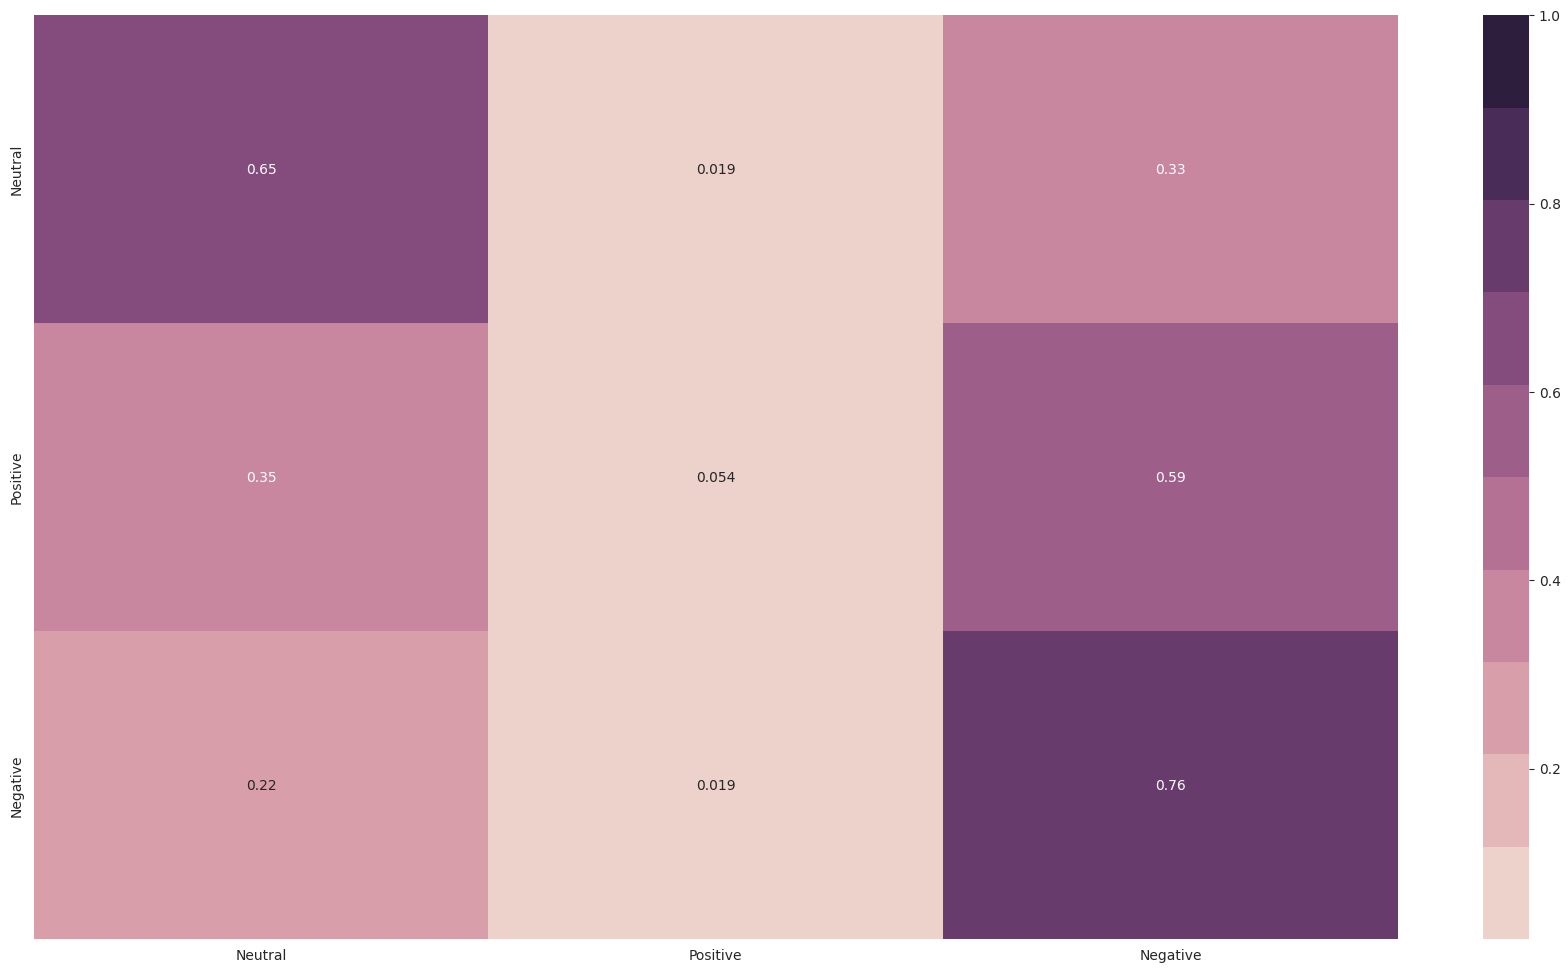

In [57]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [58]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

# Support Vector Machine

In [59]:
from sklearn.svm import SVC


Test set accuracy 0.5979578813018507
              precision    recall  f1-score   support

     Neutral       0.62      0.71      0.66       590
    Positive       0.46      0.21      0.29       354
    Negative       0.61      0.71      0.66       623

    accuracy                           0.60      1567
   macro avg       0.56      0.54      0.53      1567
weighted avg       0.58      0.60      0.57      1567



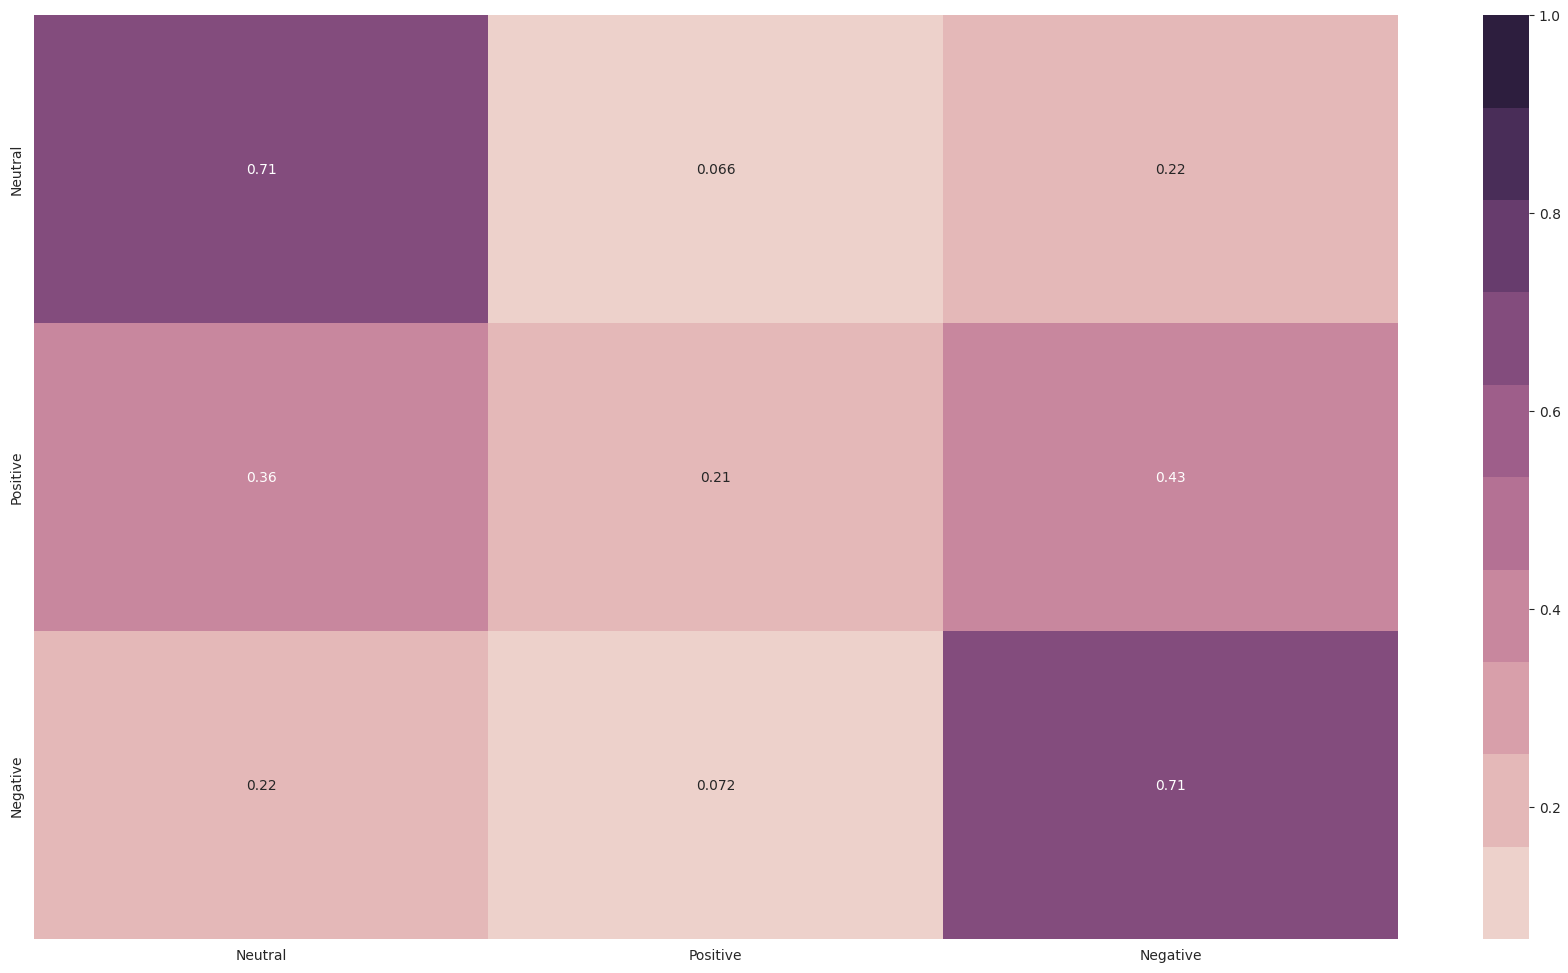

In [60]:
SVMclassifer = SVC()
SVMclassifer.fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

# XGBoost

In [61]:
from xgboost import XGBClassifier

Test set accuracy 0.5724313975749841
              precision    recall  f1-score   support

     Neutral       0.57      0.70      0.63       590
    Positive       0.40      0.18      0.25       354
    Negative       0.61      0.67      0.64       623

    accuracy                           0.57      1567
   macro avg       0.53      0.52      0.51      1567
weighted avg       0.55      0.57      0.55      1567



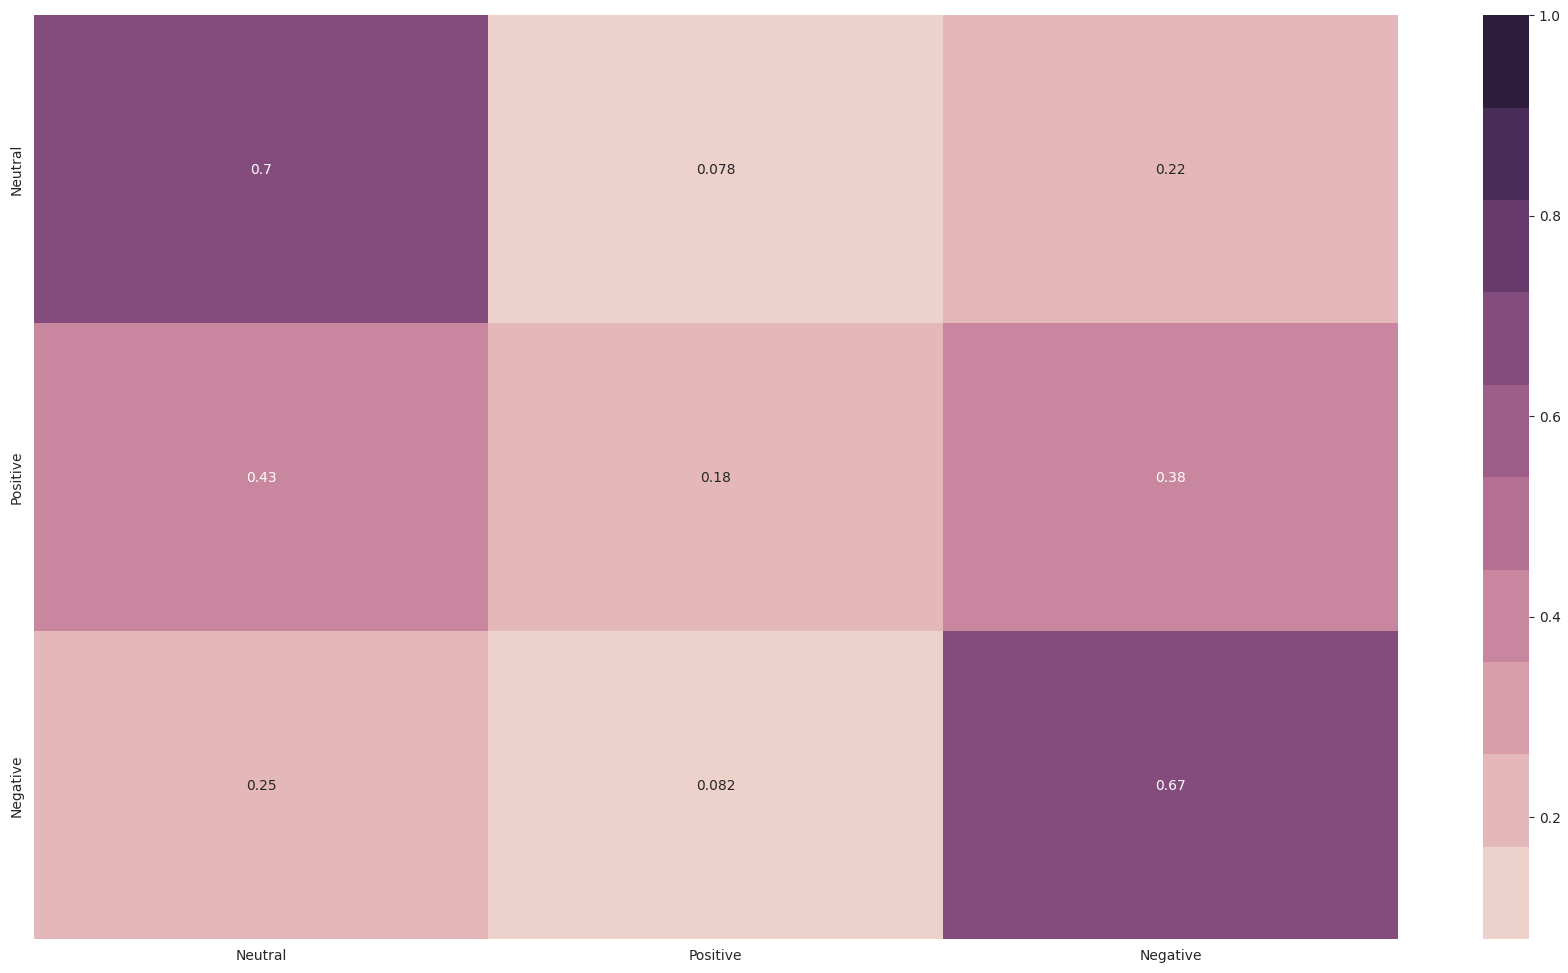

In [62]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.6234843650287173
              precision    recall  f1-score   support

     Neutral       0.65      0.70      0.68       590
    Positive       0.52      0.28      0.36       354
    Negative       0.63      0.74      0.68       623

    accuracy                           0.62      1567
   macro avg       0.60      0.58      0.57      1567
weighted avg       0.61      0.62      0.61      1567



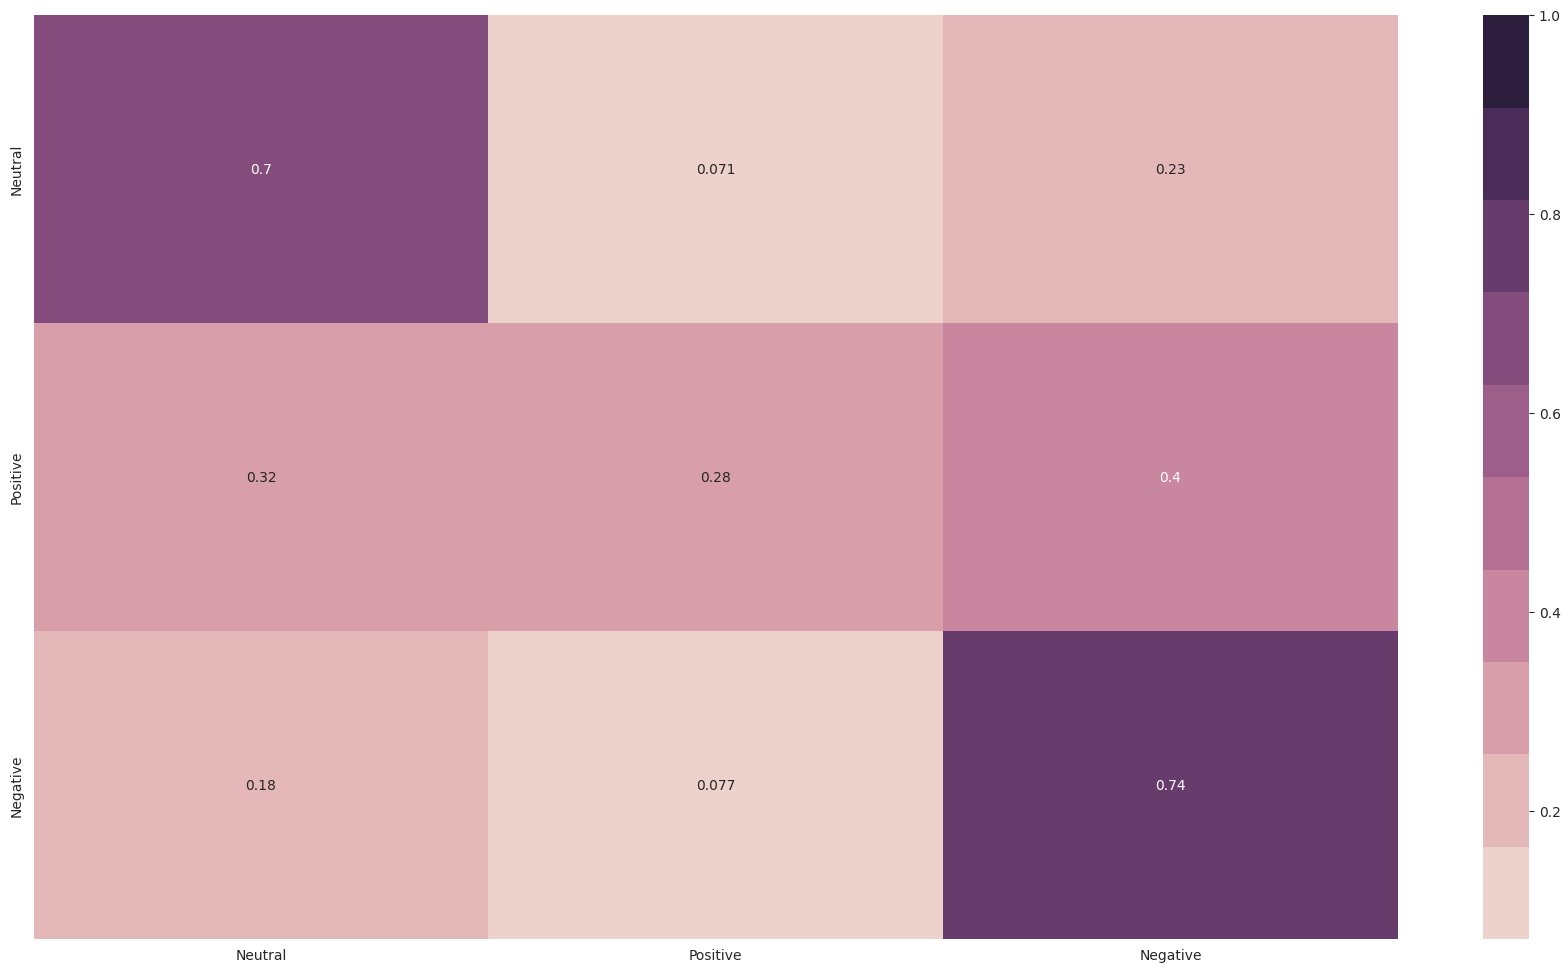

In [64]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  